<a href="https://colab.research.google.com/github/CodyByre/DS-Unit-1-Sprint-2-Statistics/blob/master/Cody_byre_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
from scipy.stats import ttest_ind, ttest_1samp, chisquare, normaltest
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-26 00:06:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-05-26 00:06:11 (607 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [0]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

In [0]:
votes = pd.read_csv('house-votes-84.data',header=None, names=column_headers, na_values='?')
votes.sample(5)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
93,democrat,y,n,y,n,n,n,y,n,y,y,y,n,n,n,y,y
79,republican,n,n,n,y,y,n,n,n,n,y,n,y,y,y,n,n
209,democrat,y,y,y,n,n,n,y,y,y,y,y,n,n,n,n,y
133,republican,n,n,n,y,y,y,n,n,n,y,n,y,y,y,n,y
138,democrat,n,n,y,n,n,y,y,y,y,y,n,n,n,y,n,y


In [0]:
votes = votes.replace({'y':1, 'n':0})
votes.tail()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
430,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
431,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,republican,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,republican,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0
434,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,NaN,0.0


In [0]:
blue = votes[votes['party']=='democrat']
red = votes[votes['party']=='republican']

# 1) Generate and numerically represent a confidence interval

In [0]:
def con_int(data, confidence=0.9):
  mydata = np.array(data)
  mymean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mymean, mymean - moe, mymean + moe)

In [0]:
blue_water = con_int(blue['water-project'])
blue_water

(0.502092050209205, 0.45147888877240516, 0.5527052116460048)

In [0]:
red_water = con_int(red['water-project'])
red_water

(0.5067567567567568, 0.4427403860131897, 0.5707731275003239)

In [0]:
water = con_int(votes['water-project'])
water

(0.5038759689922481, 0.4643093054708622, 0.543442632513634)

In [0]:
wp = (votes['water-project'])

# 2) Graphically (with a plot) represent the confidence interval

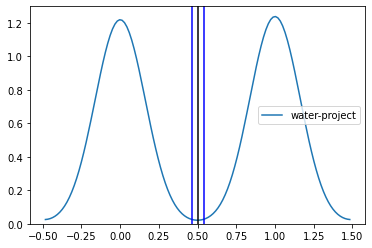

In [0]:
sns.kdeplot(wp)
CI = con_int(wp)
plt.axvline(x=CI[1], color='blue')
plt.axvline(x=CI[2], color='blue')
plt.axvline(x=CI[0], color='k');

In [0]:
#Unsure if this is correctly answering the question, or if I need to make a plot
#with a single hump.

# 3) Interpret the confidence interval - what does it tell you about the data and its distribution?

The standard error is very tight, reflecting a high percentage of confidence and a small alpha. The margin of error is very small. Two humps because of the binary nature of the data, and it is distributed quite evenly.

# 4) Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
# By hand using Numpy
# In a single line using Scipy

In [0]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic = pd.read_csv(url)

In [0]:
titanic['cabin_class'] = titanic['Pclass'].map({1:'first', 2:'second', 3:'third'})
titanic.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
324,0,3,male,28.0,15.8500,Southampton,third
642,0,1,male,39.0,0.0000,Southampton,first
254,1,1,female,31.0,164.8667,Southampton,first
252,1,2,female,24.0,26.0000,Southampton,second
60,0,3,male,22.0,9.0000,Southampton,third


In [39]:
titanic.describe()

,Survived,Pclass,Age,Fare
count,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,34.567251
std,0.491139,0.836854,14.492933,52.938648
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,1.000000,20.000000,8.050000
50%,0.000000,2.000000,28.000000,15.645850
75%,1.000000,3.000000,38.000000,33.000000
max,1.000000,3.000000,80.000000,512.329200


In [37]:
titanic.describe(exclude='number')

,Sex,Embarked,cabin_class
count,712,712,712
unique,2,3,3
top,male,Southampton,third
freq,453,554,355


In [59]:
xtab = pd.crosstab(titanic['Survived'], titanic['Sex'], margins=True)
xtab

Sex,female,male,All
Survived,,,
0,64,360,424
1,195,93,288
All,259,453,712


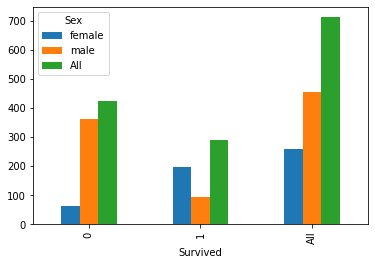

In [60]:
xtab.plot(kind='bar')

In [61]:
row_sums = xtab.iloc[0:2, 2].values
row_sums

array([424, 288])

In [62]:
col_sums = xtab.iloc[2][0:2].values
col_sums

array([259, 453])

In [63]:
total = xtab.loc['All', 'All']
total

712

In [64]:
exp = []
for i in range(len(row_sums)):
  exp_row=[]
  for column in col_sums:
    exp_val = column*row_sums[i]/total
    exp_row.append(exp_val)
  exp.append(exp_row)
pd.DataFrame(exp)

,0,1
0,154.235955,269.764045
1,104.764045,183.235955


In [66]:
obs = pd.crosstab(titanic['Survived'], titanic['Sex']).values
pd.DataFrame(obs)

,0,1
0,64,360
1,195,93


In [67]:
chi_sq = ((obs - exp)**2/(exp)).sum()
chi_sq

205.13648469340083

In [73]:
stats.chi2_contingency(obs)

(202.86944877617123,
 4.939416685451492e-46,
 1,
 array([[154.23595506, 269.76404494],
        [104.76404494, 183.23595506]]))

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)